<a href="https://colab.research.google.com/github/Rumaizakosar/Eight-Puzzle-Code/blob/main/Genetic_Algo_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Genetic Algorithms**

**Population**

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [80]:
n_cities = 10
cities = np.random.rand(n_cities, 2)
rng = np.random.default_rng()

In [81]:
order0 = rng.permutation(n_cities)
order1 = rng.permutation(n_cities)
print(order0)
print(order1)

[3 1 2 6 8 5 9 0 4 7]
[3 6 5 1 4 9 7 8 0 2]


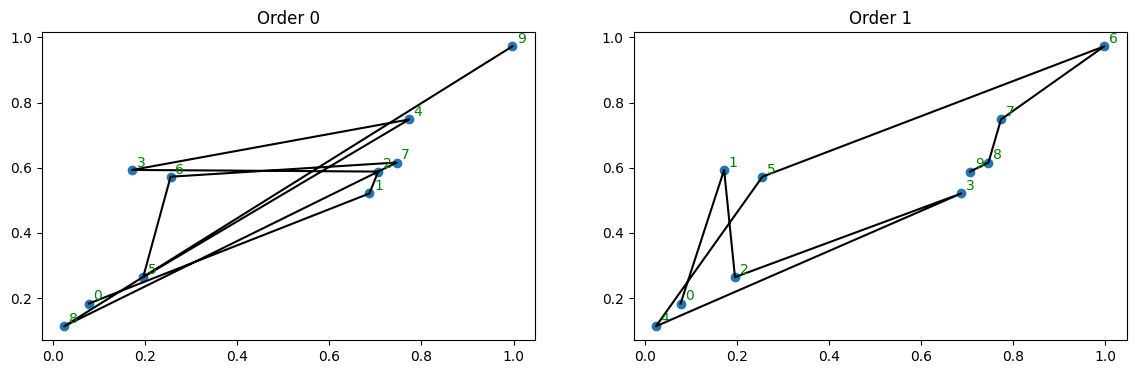

In [82]:
fig = plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 2, 1)
ind = order0
plt.title("Order 0")
ax.scatter(cities[ind, 0], cities[ind, 1])
ax.plot(cities[ind, 0], cities[ind, 1], 'k')
for i in range(n_cities):
    ax.annotate(i, (cities[ind[i], 0]+0.01, cities[ind[i], 1]+0.01), c='g')
ax = plt.subplot(1, 2, 2)
ind = order1
plt.title("Order 1")
ax.scatter(cities[ind, 0], cities[ind, 1])
ax.plot(cities[ind, 0], cities[ind, 1], 'k')
for i in range(n_cities):
    ax.annotate(i, (cities[ind[i], 0]+0.01, cities[ind[i], 1]+0.01), c='g')

In [83]:
n_population = 100
population = np.array([rng.permutation(n_cities) for i in range(n_population)])
population[:5]

array([[1, 7, 0, 9, 5, 2, 8, 4, 3, 6],
       [8, 7, 1, 0, 9, 3, 4, 6, 2, 5],
       [9, 4, 7, 8, 2, 3, 6, 1, 0, 5],
       [4, 1, 9, 7, 6, 8, 2, 3, 5, 0],
       [3, 6, 4, 1, 5, 8, 0, 9, 2, 7]])

**Evaluation**

In [84]:
d = np.zeros((n_cities, n_cities))
for i in range(n_cities):
    for j in range(i):
        d[i, j] = np.sqrt((cities[i, 0] - cities[j, 0])**2 + (cities[i,1] - cities[j, 1])**2)
        d[j, i] = d[i, j]
d[:3, :3]

array([[0.        , 0.11198858, 0.04867109],
       [0.11198858, 0.        , 0.06994097],
       [0.04867109, 0.06994097, 0.        ]])

In [85]:
def total_distance(order, distances):
    t = 0
    for i in range(1, len(order)):
        t += distances[order[i-1], order[i]]
    return t

In [86]:
print("order 0:", total_distance(order0, d))
print("order 1:", total_distance(order1, d))

order 0: 5.659071002844586
order 1: 3.9408935455574827


In [87]:
def evaluate(population, distances):
    fitness = np.zeros(len(population))
    for i in range(len(population)):
        fitness[i] = total_distance(population[i], distances)
    return fitness

In [88]:
fitness = evaluate(population, d)
for i in range(3):
    print(population[i], fitness[i])
print("Minimum: ")
print(population[np.argmin(fitness)], np.min(fitness), np.max(fitness))

[1 7 0 9 5 2 8 4 3 6] 4.059682155459917
[8 7 1 0 9 3 4 6 2 5] 3.626600053080244
[9 4 7 8 2 3 6 1 0 5] 4.7565553700261205
Minimum: 
[5 6 8 7 0 2 1 9 4 3] 2.859071633520102 6.665768824553527


**Selection**

In [89]:
def truncation_selection(population, fitness, p=0.2):
    n_elites = int(np.floor(len(population) * p))
    elites = np.argsort(fitness)[:n_elites]
    return population[elites], fitness[elites]

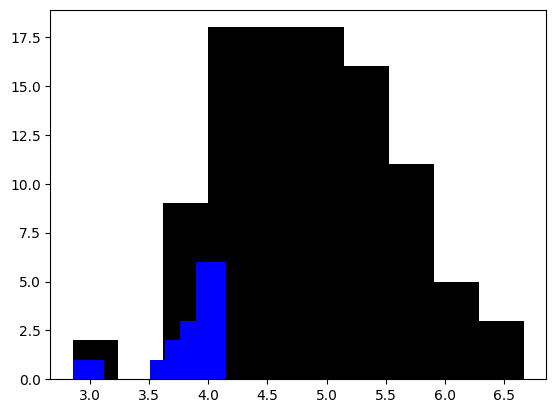

In [90]:
elites, efit = truncation_selection(population, fitness)
plt.hist(fitness, color='k')
plt.hist(efit, color='b');

In [91]:
def fp_selection(population, fitness):
    p = (np.max(fitness) - fitness)
    p /= np.sum(p)
    rng = np.random.default_rng()
    ind = rng.choice(len(population), p=p)
    return population[ind], fitness[ind]

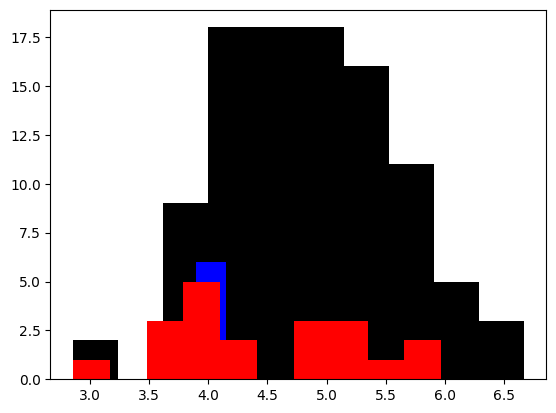

In [92]:
fp_fits = np.zeros(len(efit))
for i in range(len(efit)):
    p, f = fp_selection(population, fitness)
    fp_fits[i] = f
plt.hist(fitness, color='k')
plt.hist(efit, color='b')
plt.hist(fp_fits, color='r');

**Exercise 1**

In [93]:
def tournament_selection(population, fitness, t_size=3):
    ind = rng.choice(len(population))
    return population[ind], fitness[ind]

In [94]:
# %load solutions/3_1_1.py

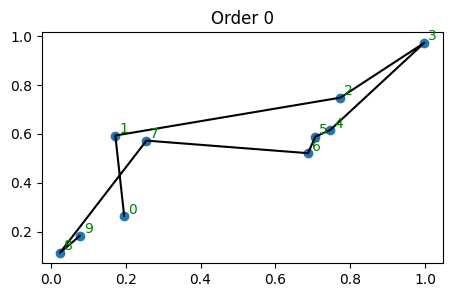

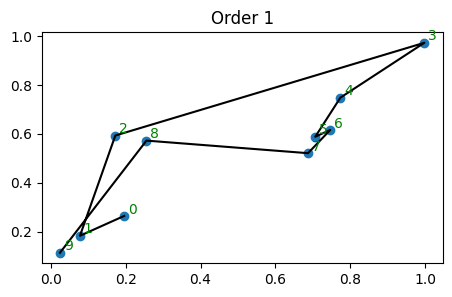

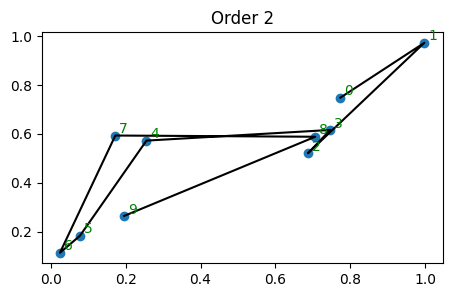

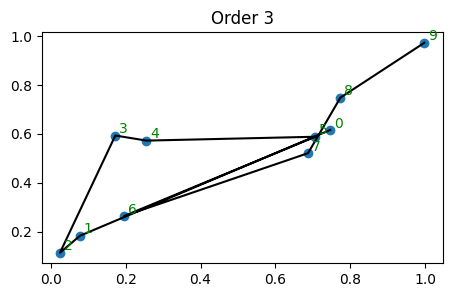

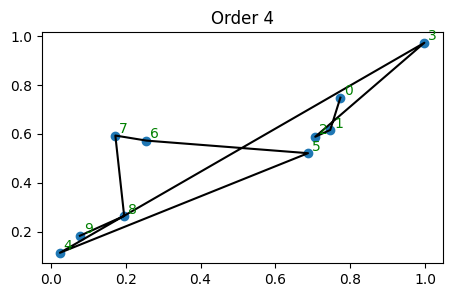

In [95]:
indivs = elites[:5]
#indivs = []
#for i in range(5):
#    p, f = tournament_selection(population, fitness)
#    indivs.append(p)
for i in range(len(indivs)):
    fig = plt.figure(figsize=(6*len(indivs), 3))
    ax = plt.subplot(1, len(indivs), 1)
    ind = indivs[i]
    plt.title("Order "+str(i))
    ax.scatter(cities[ind, 0], cities[ind, 1])
    ax.plot(cities[ind, 0], cities[ind, 1], 'k')
    for i in range(n_cities):
        ax.annotate(i, (cities[ind[i], 0]+0.01, cities[ind[i], 1]+0.01), c='g')

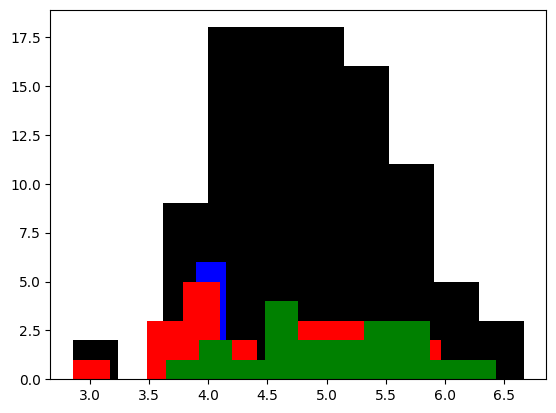

In [96]:
t_fits = np.zeros(len(efit))
for i in range(len(efit)):
    p, f = tournament_selection(population, fitness)
    t_fits[i] = f
plt.hist(fitness, color='k')
plt.hist(efit, color='b')
plt.hist(fp_fits, color='r')
plt.hist(t_fits, color='g');

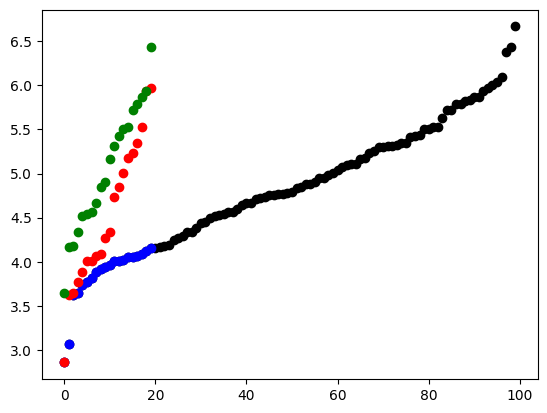

In [97]:
plt.scatter(range(len(fitness)), np.sort(fitness), color='k')
plt.scatter(range(len(efit)), np.sort(efit), color='b')
plt.scatter(range(len(fp_fits)), np.sort(fp_fits), color='r')
plt.scatter(range(len(t_fits)), np.sort(t_fits), color='g');

**Crossover**

In [98]:
def one_point(p1, p2):
    rng = np.random.default_rng()
    x = rng.choice(np.arange(1, np.minimum(len(p1)-1, len(p2)-1)))
    return np.concatenate((p1[:x], p2[x:])), np.concatenate((p2[:x],p1[x:]))

In [99]:
parent1, _ = tournament_selection(population, fitness)
parent2, _ = tournament_selection(population, fitness)
print(parent1, parent2)
child1, child2 = one_point(parent1, parent2)
print("crossover: ")
print(child1, child2)

[4 0 6 3 5 1 8 7 2 9] [3 5 4 7 6 1 8 9 2 0]
crossover: 
[4 0 6 3 5 1 8 9 2 0] [3 5 4 7 6 1 8 7 2 9]


In [100]:
pip install pymoo


In [101]:
from pymoo.operators.crossover import erx

print("Parents")
print(population[0], population[1])
print("Adjacency Matrix 1")
print(erx.calc_adjency_matrix(population[0]))
print("Adjacency Matrix 2")
print(erx.calc_adjency_matrix(population[1]))
print("Child")
erx.erx(population[0], population[1])

Parents
[1 7 0 9 5 2 8 4 3 6] [8 7 1 0 9 3 4 6 2 5]
Adjacency Matrix 1
{1: {6, 7}, 7: {0, 1}, 0: {9, 7}, 9: {0, 5}, 5: {9, 2}, 2: {8, 5}, 8: {2, 4}, 4: {8, 3}, 3: {4, 6}, 6: {1, 3}}
Adjacency Matrix 2
{8: {5, 7}, 7: {8, 1}, 1: {0, 7}, 0: {1, 9}, 9: {0, 3}, 3: {9, 4}, 4: {3, 6}, 6: {2, 4}, 2: {5, 6}, 5: {8, 2}}
Child


[4, 3, 6, 1, 0, 9, 5, 2, 8, 7]

**Mutation**

**Exercise 2**

In [102]:
def mutate(ind):
    return ind

In [103]:
# %load solutions/3_1_2.py

In [104]:
# Define a dummy problem (replace this with your actual problem definition)
class DummyProblem:
    def __init__(self):
        self.n_var = 8  # Replace with the actual number of variables

problem = DummyProblem()


**The Genetic Algorithm**

In [105]:
def ga_step(population):
    fitness = evaluate(population, d)
    next_pop, _ = truncation_selection(population, fitness)
    while len(next_pop) < len(population):
        parent1, _ = tournament_selection(population, fitness)
        parent2, _ = tournament_selection(population, fitness)
        child = erx.erx(parent1, parent2)
        child = mutate(child)
        next_pop = np.concatenate((next_pop, [child]))
    return next_pop, fitness

In [106]:
n_cities = 20
cities = np.random.rand(n_cities, 2)
d = np.zeros((n_cities, n_cities))
for i in range(n_cities):
    for j in range(i):
        d[i, j] = np.sqrt((cities[i, 0] - cities[j, 0])**2 + (cities[i,1] - cities[j, 1])**2)
        d[j, i] = d[i, j]

In [107]:
# %load solutions/3_1_2.py

In [108]:
# Define a dummy problem (replace this with your actual problem definition)
class DummyProblem:
    def __init__(self):
        self.n_var = 8  # Replace with the actual number of variables

problem = DummyProblem()

In [109]:
def ga_step(population):
    fitness = evaluate(population, d)
    next_pop, _ = truncation_selection(population, fitness)
    while len(next_pop) < len(population):
        parent1, _ = tournament_selection(population, fitness)
        parent2, _ = tournament_selection(population, fitness)
        # Renamed the variable to avoid overwriting the erx module
        child = erx.erx(parent1, parent2)
        child = mutate(child)
        next_pop = np.concatenate((next_pop, [child]))
    return next_pop, fitness

In [110]:
n_cities = 20
cities = np.random.rand(n_cities, 2)


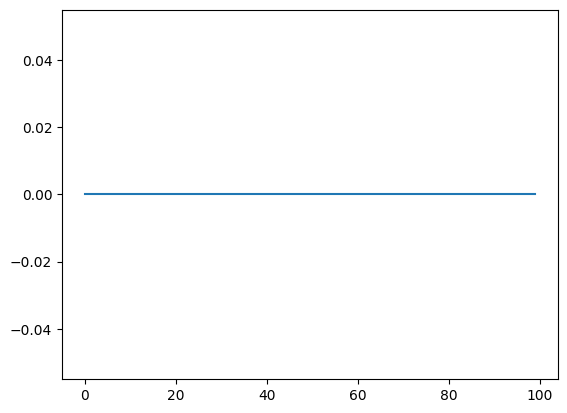

In [111]:
plt.plot(minfit);